#### Zugriff aus python mit Hilfe von Pandas

In [339]:
import sqlite3 as sql
import pandas as pd
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import dateutil
import datetime
import sklearn

Baue eine Verbindung zur meiner Datenbank auf:

In [340]:
conn = sql.connect('../data/20190331_schmidt_home-assistant_v2.db')

### Die Daten aus der SQL mit Hilfe von Pandas auslesen

Tabellennamen ermitteln

In [341]:
table_names = pd.read_sql_query('select name from sqlite_master where type = "table"', conn)
table_names

,name
0,events
1,recorder_runs
2,schema_changes
3,states


Tabelle events einlesen

In [342]:
events = pd.read_sql_query('select * from events', conn)

In [360]:
events.tail(100)

,event_id,event_type,event_data,origin,time_fired,created,context_id,context_user_id
15230,28671,state_changed,"{""entity_id"": ""sensor.living_room_wt_current_t...",LOCAL,2019-03-31 15:43:46.015754,2019-03-31 15:43:46.028529,962a89379e534c26a96722ecb5e7a59e,None
15231,28672,state_changed,"{""entity_id"": ""sensor.kitchen_wt_current_tempe...",LOCAL,2019-03-31 15:44:47.017743,2019-03-31 15:44:47.029235,2a877e7ae70341fd8123d1345186f773,None
15232,28673,state_changed,"{""entity_id"": ""sensor.living_room_wt_current_t...",LOCAL,2019-03-31 15:46:49.015508,2019-03-31 15:46:49.027896,47b4975465df4b05a205cbfff0a00183,None
15233,28674,state_changed,"{""entity_id"": ""sensor.bath_wt_current_temperat...",LOCAL,2019-03-31 15:46:49.029635,2019-03-31 15:46:49.092149,651390a05729466b8148474a7e173053,None
15234,28675,state_changed,"{""entity_id"": ""sensor.kitchen_wt_current_tempe...",LOCAL,2019-03-31 15:46:49.043030,2019-03-31 15:46:49.164379,8af4d1dbed674a9ebf9c6f4350384eea,None
15235,28676,state_changed,"{""entity_id"": ""sensor.kitchen_wt_current_tempe...",LOCAL,2019-03-31 15:49:52.886263,2019-03-31 15:49:52.898387,2d14e664dcbf40bdbba508d9f520fc27,None
15236,28677,state_changed,"{""entity_id"": ""sensor.living_room_wt_current_t...",LOCAL,2019-03-31 15:49:52.906291,2019-03-31 15:49:52.965336,6d1e19db5b63491ab44128d9773e43cb,None
15237,28678,state_changed,"{""entity_id"": ""sensor.bath_wt_current_temperat...",LOCAL,2019-03-31 15:52:56.873406,2019-03-31 15:52:56.887673,71dffa3dac1b4c29a70eeff4bfe05c2e,None
15238,28679,state_changed,"{""entity_id"": ""sensor.living_room_wt_current_t...",LOCAL,2019-03-31 15:52:56.904846,2019-03-31 15:52:56.960329,6c6be77df21d44b3950485a4aba6240e,None
15239,28680,state_changed,"{""entity_id"": ""sensor.bath_wt_current_temperat...",LOCAL,2019-03-31 15:55:57.013823,2019-03-31 15:55:57.027988,a2d372b68d3d4dbda2c00458f4ca6c52,None


#### Tabelle recorder_runs einlesen

In [361]:
recorder_runs = pd.read_sql_query('select * from recorder_runs', conn)

In [362]:
recorder_runs.head()

,run_id,start,end,closed_incorrect,created
0,1,2019-03-14 20:25:23.434947,2019-03-14 20:30:46.775168,0,2019-03-14 20:25:26.805756
1,2,2019-03-14 20:30:58.627587,2019-03-14 20:34:30.843322,0,2019-03-14 20:31:01.310771
2,3,2019-03-14 20:34:43.543716,2019-03-14 20:37:48.007651,0,2019-03-14 20:34:46.236966
3,4,2019-03-14 20:37:59.974984,2019-03-14 20:42:23.147717,0,2019-03-14 20:38:02.612598
4,5,2019-03-14 20:42:35.949202,2019-03-14 20:59:04.860145,0,2019-03-14 20:42:38.634857


#### Tabelle schema_changes einlesen

In [363]:
schema_changes = pd.read_sql_query('select * from schema_changes', conn)

In [364]:
schema_changes.head()

,change_id,schema_version,changed
0,1,7,2019-03-14 20:25:26.737487


#### Tabelle states einlesen

In [405]:
states = pd.read_sql_query('select * from states', conn)

In [406]:
states.tail(30)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
14420,27290,sensor,sensor.living_room_ht_north_current_temperature,20.7,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28741,2019-03-31 17:17:16.029015,2019-03-31 17:17:16.029015,2019-03-31 17:17:16.106799,8a0664dd6c4d4bd786793c93683b990a,None
14421,27291,sensor,sensor.living_room_wt_current_temperature,20.9,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28742,2019-03-31 17:18:17.017738,2019-03-31 17:18:17.017738,2019-03-31 17:18:17.032567,c1c730489b8448b794bbfc8c756b7bb9,None
14422,27292,sensor,sensor.sleeping_room_wt_current_temperature,20.2,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28743,2019-03-31 17:19:18.014430,2019-03-31 17:19:18.014430,2019-03-31 17:19:18.023846,2c0d83920b3c4aa6a1f8602e0bd414de,None
14423,27293,sensor,sensor.kitchen_wt_current_temperature,20.4,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28744,2019-03-31 17:19:18.029695,2019-03-31 17:19:18.029695,2019-03-31 17:19:18.095080,25b6684e5c0d4d03b0592ba9af5188b3,None
14424,27294,sensor,sensor.bath_wt_current_temperature,21.1,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28745,2019-03-31 17:21:20.017543,2019-03-31 17:21:20.017543,2019-03-31 17:21:20.057708,ecc4f6b6dda44d81879bdc06900a856f,None
14425,27295,sensor,sensor.sleeping_room_wt_current_temperature,20.4,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28746,2019-03-31 17:24:24.875490,2019-03-31 17:24:24.875490,2019-03-31 17:24:24.906407,b44834bbb20c456ca7ca74d245a766aa,None
14426,27296,sensor,sensor.living_room_wt_current_temperature,21.0,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28747,2019-03-31 17:24:24.890387,2019-03-31 17:24:24.890387,2019-03-31 17:24:24.977507,9927736a617544ab93e956797dbce7de,None
14427,27297,sensor,sensor.bath_wt_current_temperature,21.3,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28748,2019-03-31 17:27:28.881826,2019-03-31 17:27:28.881826,2019-03-31 17:27:28.903145,5240c38449cc4c17838569f06fc6d24e,None
14428,27298,sensor,sensor.kitchen_wt_current_temperature,20.6,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28749,2019-03-31 17:27:28.907483,2019-03-31 17:27:28.907483,2019-03-31 17:27:28.969702,24127f3b02284aa8b53d3a868ae35de1,None
14429,27299,sensor,sensor.sleeping_room_wt_current_temperature,20.6,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28750,2019-03-31 17:30:29.022347,2019-03-31 17:30:29.022347,2019-03-31 17:30:29.041017,1daba5e356e844e5bc67fc1afd16295e,None


### Vertiefung der Datensuche in der states Tabelle entity sensor

In [638]:
sensor = states[states['entity_id'].str.contains('sensor')]

In [639]:
weather = states[states['entity_id'].str.contains('weather')]
weather.head(20).describe()

,state_id,event_id
count,20.000000,20.000000
mean,12998.600000,13569.600000
std,69.080731,69.080731
min,12917.000000,13488.000000
25%,12921.750000,13492.750000
50%,12998.500000,13569.500000
75%,13066.250000,13637.250000
max,13136.000000,13707.000000


In [640]:
state_sensor_living_room  = sensor[sensor['entity_id'].str.contains('living')]
state_sensor_living_room.head(10)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
8270,21140,sensor,sensor.living_room_wt_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22264,2019-03-25 19:57:44.973797,2019-03-25 19:57:44.973797,2019-03-25 19:57:52.070935,ce0fc3a423974300a3692d82d30655dc,None
8271,21141,sensor,sensor.living_room_wt_set_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22265,2019-03-25 19:57:44.974569,2019-03-25 19:57:44.974569,2019-03-25 19:57:52.136055,86d6f368cd094e108494d4086f90c220,None
8272,21142,sensor,sensor.living_room_wt_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22266,2019-03-25 19:57:44.975335,2019-03-25 19:57:44.975335,2019-03-25 19:57:52.200638,fe08497741454ef89601ce0c53f7518c,None
8273,21143,sensor,sensor.living_room_ht_south_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22267,2019-03-25 19:57:44.976205,2019-03-25 19:57:44.976205,2019-03-25 19:57:52.254811,aebbee5404cf4187bb0636b942519ed3,None
8274,21144,sensor,sensor.living_room_ht_south_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22268,2019-03-25 19:57:44.977049,2019-03-25 19:57:44.977049,2019-03-25 19:57:52.315175,e598396b4caf420db8959e76cba927eb,None
8275,21145,sensor,sensor.living_room_ht_south_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22269,2019-03-25 19:57:44.977866,2019-03-25 19:57:44.977866,2019-03-25 19:57:52.376552,1198268b5e5e4f29b194fe06cf126691,None
8276,21146,sensor,sensor.living_room_ht_north_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22270,2019-03-25 19:57:44.978697,2019-03-25 19:57:44.978697,2019-03-25 19:57:52.435386,9f20634456b44ca1be6f8cbec30b0c4f,None
8277,21147,sensor,sensor.living_room_ht_north_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22271,2019-03-25 19:57:44.979541,2019-03-25 19:57:44.979541,2019-03-25 19:57:52.484922,54fae313ec214491959b117a9b8040d9,None
8278,21148,sensor,sensor.living_room_ht_north_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22272,2019-03-25 19:57:44.980351,2019-03-25 19:57:44.980351,2019-03-25 19:57:52.548418,09e6f991d1a64fdfa4a4084584558e58,None
8310,21180,sensor,sensor.living_room_wt_current_temperature,20.3,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22337,2019-03-25 19:57:46.455667,2019-03-25 19:57:46.455667,2019-03-25 19:57:56.420053,bb15d6ccf39a409f9412be8b57570944,None


In [641]:
state_sensor_living_room_clean = state_sensor_living_room.loc[:,('entity_id','state','last_updated')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('temperature')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('wt')]
living_room_wt_tcurr = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('current')]
living_room_wt_tset = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('set')]


In [642]:
living_room_wt_tcurr.loc[:,'last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [643]:
living_room_wt_tset.loc[:,'last_updated'] = living_room_wt_tset['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [644]:
living_room_wt_tcurr[living_room_wt_tcurr.state =='unknown']

,entity_id,state,last_updated
8270,sensor.living_room_wt_current_temperature,unknown,2019-03-25 19:57:44.973797
8357,sensor.living_room_wt_current_temperature,unknown,2019-03-25 20:16:55.788703
8422,sensor.living_room_wt_current_temperature,unknown,2019-03-25 20:19:18.571112
8496,sensor.living_room_wt_current_temperature,unknown,2019-03-25 20:20:51.046538


In [645]:
living_room_wt_tcurr = living_room_wt_tcurr[living_room_wt_tcurr.state !='unknown']
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr['state'] = living_room_wt_tcurr['state'].astype(float)

In [646]:
living_room_wt_tset = living_room_wt_tset[living_room_wt_tset.state !='unknown']
living_room_wt_tset = living_room_wt_tset[(living_room_wt_tset['last_updated'] > start_date) & (living_room_wt_tset['last_updated'] < end_date)]
living_room_wt_tset['state'] = living_room_wt_tset['state'].astype(float)

In [647]:
living_room_wt_tcurr

,entity_id,state,last_updated
8310,sensor.living_room_wt_current_temperature,20.3,2019-03-25 19:57:46.455667
8397,sensor.living_room_wt_current_temperature,20.3,2019-03-25 20:16:57.722894
8475,sensor.living_room_wt_current_temperature,20.3,2019-03-25 20:19:19.884156
8549,sensor.living_room_wt_current_temperature,20.3,2019-03-25 20:20:52.671041
8592,sensor.living_room_wt_current_temperature,20.2,2019-03-25 20:56:24.038543
8596,sensor.living_room_wt_current_temperature,20.0,2019-03-25 20:58:26.037206
8612,sensor.living_room_wt_current_temperature,19.8,2019-03-25 21:15:43.012985
8614,sensor.living_room_wt_current_temperature,20.0,2019-03-25 21:18:46.039676
8615,sensor.living_room_wt_current_temperature,19.8,2019-03-25 21:23:53.954707
8616,sensor.living_room_wt_current_temperature,20.0,2019-03-25 21:30:58.024491


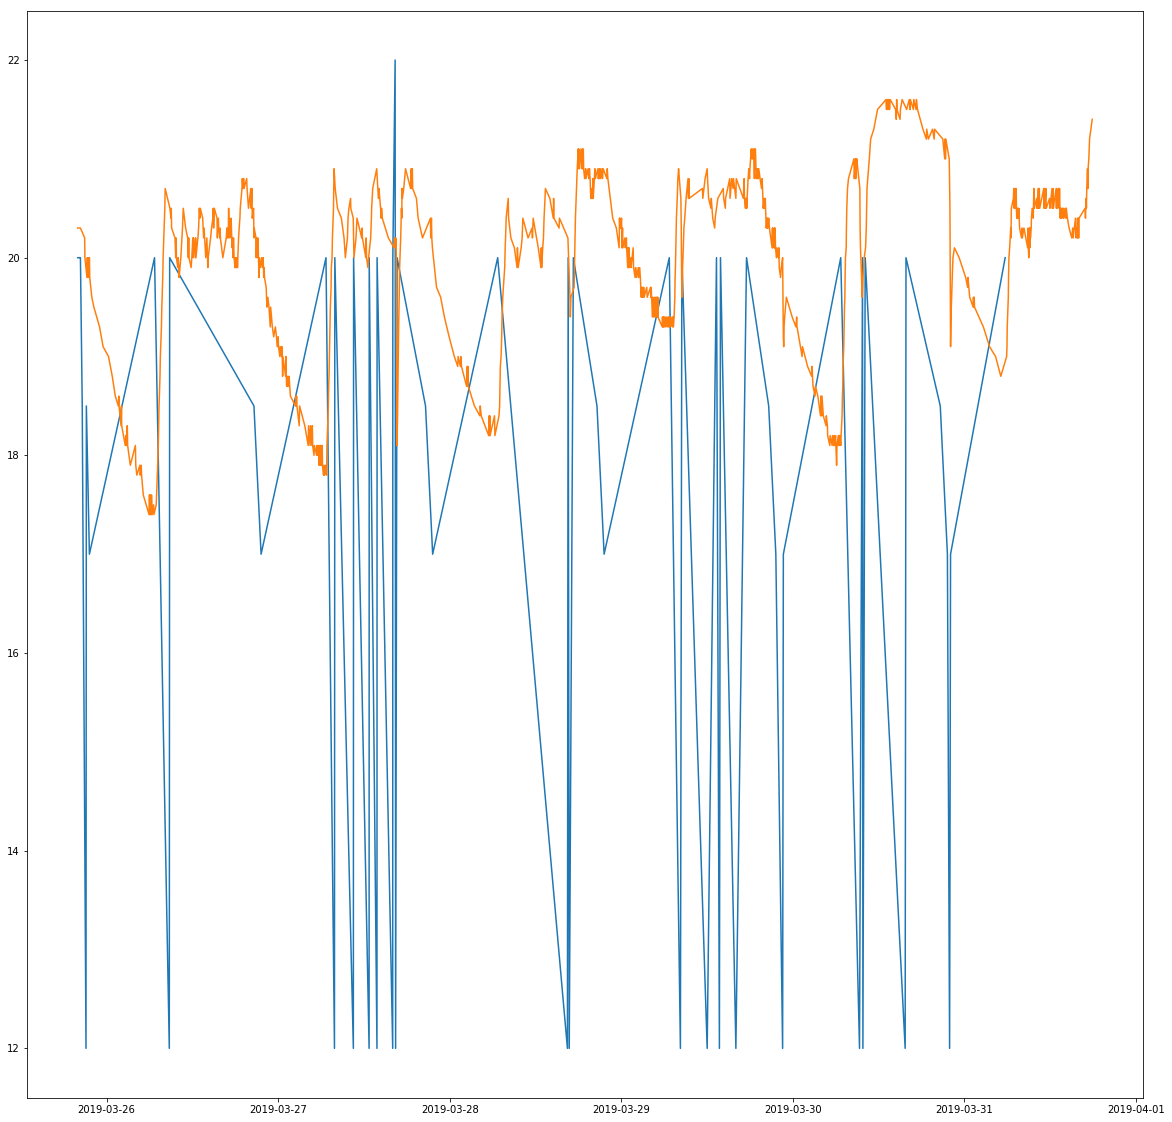

In [648]:
dates = matplotlib.dates.date2num(living_room_wt_tcurr['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
dates2 = matplotlib.dates.date2num(living_room_wt_tset['last_updated'])
matplotlib.pyplot.plot_date(dates2, living_room_wt_tset['state'], '-')
matplotlib.pyplot.plot_date(dates, living_room_wt_tcurr['state'], '-');

In [649]:
end_date = np.datetime64('2019-04-02 23:59:00')
start_date = np.datetime64('2019-03-12 00:00:00')

In [650]:
pd.read_sql_query('SELECT entity_id, COUNT(*) as count FROM states GROUP BY entity_id', conn).head()

,entity_id,count
0,binary_sensor.bad_fensterkontakt_bad,4
1,binary_sensor.kuche_fensterkontakt_ku,4
2,binary_sensor.schlafzimmer_fensterkontakt_sz,12
3,binary_sensor.wohnzimmer_fensterkontakt_nord,4
4,binary_sensor.wohnzimmer_fensterkontakt_sud,2


In [651]:
living_room_wt_tcurr.head()

,entity_id,state,last_updated
8310,sensor.living_room_wt_current_temperature,20.3,2019-03-25 19:57:46.455667
8397,sensor.living_room_wt_current_temperature,20.3,2019-03-25 20:16:57.722894
8475,sensor.living_room_wt_current_temperature,20.3,2019-03-25 20:19:19.884156
8549,sensor.living_room_wt_current_temperature,20.3,2019-03-25 20:20:52.671041
8592,sensor.living_room_wt_current_temperature,20.2,2019-03-25 20:56:24.038543


In [652]:
living_room_wt_tcurr['last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

TypeError: Parser must be a string or character stream, not Timestamp

In [653]:
living_room_wt_tcurr['weekday'] = living_room_wt_tcurr['last_updated'].dt.weekday
living_room_wt_tcurr['time'] = living_room_wt_tcurr['last_updated'].dt.time

In [654]:
living_room_wt_tcurr['time'] = living_room_wt_tcurr['time'].map(lambda x:x.hour+x.minute/60.0)

In [655]:
X_train = living_room_wt_tcurr.drop(['entity_id','state','last_updated'], axis=1)
y_train = living_room_wt_tcurr['state']

In [684]:
X_train.shape

(911, 2)

In [450]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr = living_room_wt_tcurr.sort_values(by=['state'])

### Vertiefung der Datensuche in der states Tabelle entity climate

In [451]:
climate = states[states['entity_id'].str.contains('climate')]

In [452]:
climate.head(2)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
3,12873,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",13444,2019-03-19 12:22:26.931085,2019-03-20 20:53:59.890590,2019-03-20 20:53:59.915400,5a27e169c1704d6d9083b3503f74e4a6,None
19,12889,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",13460,2019-03-19 12:22:26.931085,2019-03-20 21:09:14.906515,2019-03-20 21:09:14.926393,4e5ad7dcfb7e4d1593198d451e899254,None


In [453]:
state_climate_living_room  = climate[climate['entity_id'].str.contains('wohn')]
state_climate_living_room.head(2)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
3,12873,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",13444,2019-03-19 12:22:26.931085,2019-03-20 20:53:59.890590,2019-03-20 20:53:59.915400,5a27e169c1704d6d9083b3503f74e4a6,None
19,12889,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",13460,2019-03-19 12:22:26.931085,2019-03-20 21:09:14.906515,2019-03-20 21:09:14.926393,4e5ad7dcfb7e4d1593198d451e899254,None


In [454]:
state_climate_living_room = state_climate_living_room.loc[:,('entity_id','state','attributes','last_updated')]

In [455]:
state_climate_living_room['last_updated'] = state_climate_living_room['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [456]:
state_climate_living_room['weekday'] = state_climate_living_room['last_updated'].dt.weekday
state_climate_living_room['time'] = state_climate_living_room['last_updated'].dt.time

In [457]:
state_climate_living_room.head(2)

,entity_id,state,attributes,last_updated,weekday,time
3,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-20 20:53:59.890590,2,20:53:59.890590
19,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-20 21:09:14.906515,2,21:09:14.906515


In [458]:
#state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date) & (state_climate_living_room['last_updated'] < end_date)]

In [459]:
current_temp = []
set_temp = []
for value in state_climate_living_room['attributes']:
    json_acceptable_string = value.replace("'", "\"")
    dicti = json.loads(json_acceptable_string)
    current_temp.append(dicti['current_temperature'])
    set_temp.append(dicti['temperature'])

In [460]:
state_climate_living_room['current_temp'] = current_temp
state_climate_living_room['set_temp'] = set_temp

In [461]:
state_climate_living_room_as_x = state_climate_living_room.drop(['entity_id','attributes','last_updated'],axis=1)

In [462]:
state_climate_living_room_as_x.head(30)

,state,weekday,time,current_temp,set_temp
3,manual,2,20:53:59.890590,16.9,16.5
19,manual,2,21:09:14.906515,16.7,16.5
26,manual,2,21:14:19.924857,16.9,16.5
37,manual,2,21:24:29.926726,16.7,16.5
45,manual,2,21:29:33.941955,16.9,16.5
59,manual,2,21:34:38.952963,16.7,16.5
65,manual,2,21:39:43.945832,16.9,16.5
72,manual,2,21:44:47.966793,16.7,16.5
89,manual,2,22:00:01.852181,16.9,16.5
98,manual,2,22:05:06.875616,16.7,16.5


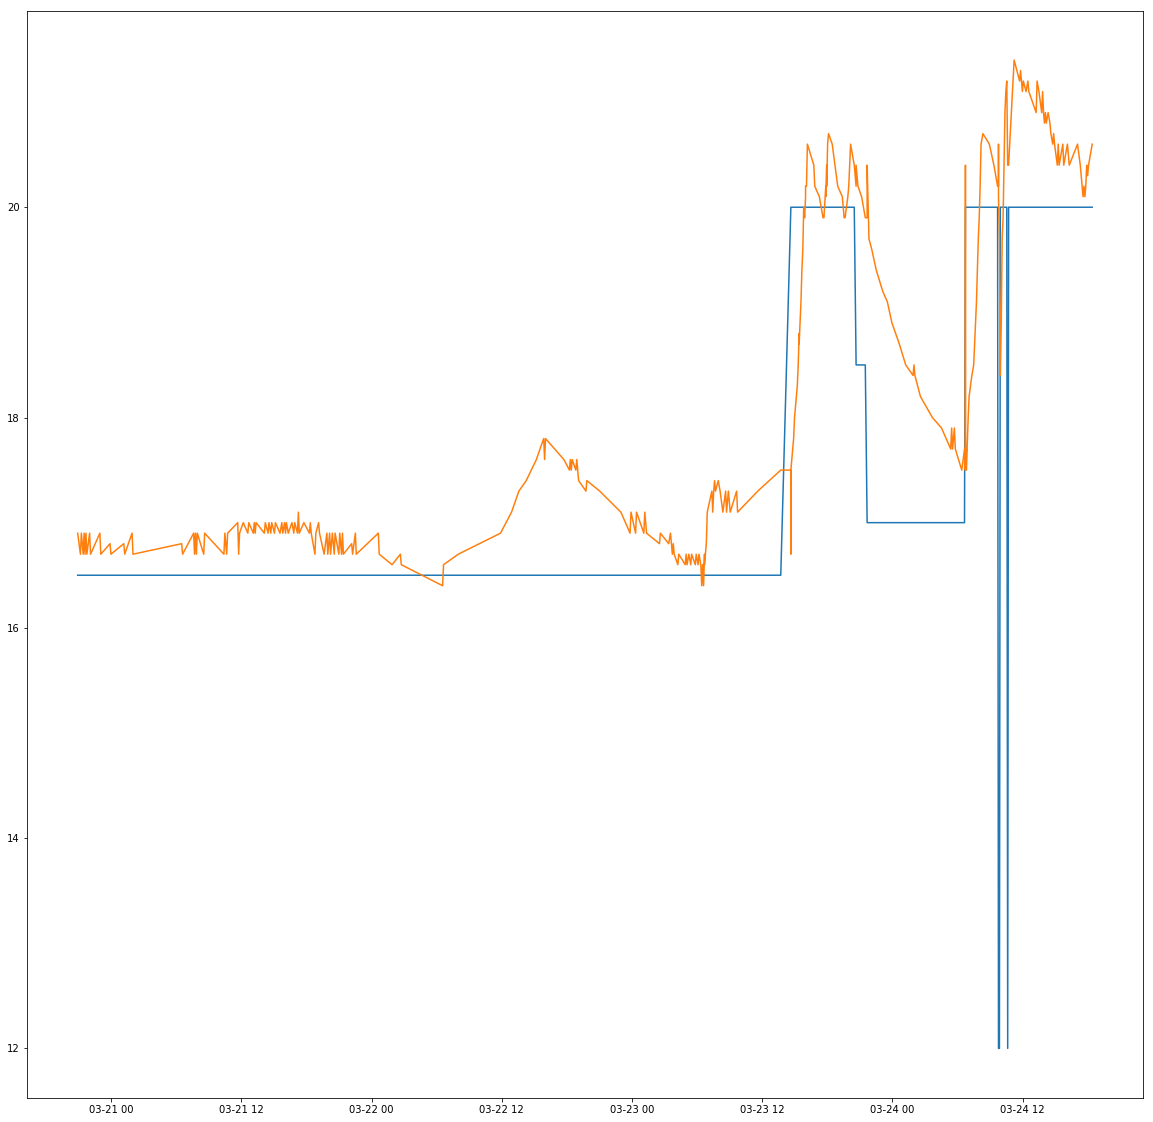

In [463]:
dates = matplotlib.dates.date2num(state_climate_living_room['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.plot_date(dates, set_temp, '-')
matplotlib.pyplot.plot_date(dates, current_temp, '-')
#matplotlib.pyplot.plot_date(dates, state_climate_living_room_as_x['twp'], '-');

In [464]:
time_steps = [datetime.time(0, 0, 0, 0),datetime.time(6, 30, 0, 0),datetime.time(20, 30, 0, 0),datetime.time(21, 30, 0, 0),datetime.time(23, 59, 0, 0)]
set_temp_wp = [17.0, 20.0, 18.5,17.0,17.0]

In [465]:
def add_wp(time_steps,set_temps,time_row):
    for index, ti in enumerate(time_steps):
        if time_row < ti:
            #print(str(time_row) + ' ' +str(ti)+' ' + str(index) + ' ' + str(set_temps[index-1]))
            return set_temps[index-1]
    

In [466]:
weekprogram = []
for row in state_climate_living_room_as_x.index:
    weekprogram.append(add_wp(time_steps, set_temp_wp, state_climate_living_room_as_x.loc[row,'time']))

In [467]:
state_climate_living_room_as_x['twp'] = weekprogram

In [468]:
state_climate_living_room_as_x

,state,weekday,time,current_temp,set_temp,twp
3,manual,2,20:53:59.890590,16.9,16.5,18.5
19,manual,2,21:09:14.906515,16.7,16.5,18.5
26,manual,2,21:14:19.924857,16.9,16.5,18.5
37,manual,2,21:24:29.926726,16.7,16.5,18.5
45,manual,2,21:29:33.941955,16.9,16.5,18.5
59,manual,2,21:34:38.952963,16.7,16.5,17.0
65,manual,2,21:39:43.945832,16.9,16.5,17.0
72,manual,2,21:44:47.966793,16.7,16.5,17.0
89,manual,2,22:00:01.852181,16.9,16.5,17.0
98,manual,2,22:05:06.875616,16.7,16.5,17.0


In [469]:
#categorical = pd.get_dummies(state_climate_living_room_as_x[['state']])
#state_climate_living_room_as_x = pd.concat([state_climate_living_room_as_x, categorical], axis=1, sort=False)



In [470]:
state_climate_living_room_as_x['time'] = state_climate_living_room_as_x['time'].map(lambda x:x.hour+x.minute/60.0)

In [471]:
state_climate_living_room_as_x = state_climate_living_room_as_x[state_climate_living_room_as_x['state'].str.contains('auto')]

In [480]:
state_climate_living_room_as_x.shape

(163, 6)

In [500]:
X_train = state_climate_living_room_as_x.drop(['current_temp','state','set_temp','twp'], axis=1)
y_train = state_climate_living_room_as_x['current_temp']

In [518]:
y_train

5255    17.5
5256    16.7
5259    17.5
5268    17.6
5284    17.8
5292    18.0
5306    18.2
5313    18.3
5323    18.5
5331    18.8
5334    18.8
5335    18.7
5360    19.1
5361    19.1
5368    19.4
5376    19.6
5387    20.0
5393    19.9
5394    19.9
5395    19.9
5404    20.1
5405    20.2
5414    20.2
5421    20.6
5475    20.4
5488    20.2
5519    20.1
5556    19.9
5562    19.9
5577    20.2
        ... 
7396    21.1
7427    20.9
7436    21.1
7444    20.9
7451    20.8
7459    20.9
7466    20.8
7479    20.9
7507    20.8
7514    20.7
7528    20.6
7537    20.7
7543    20.6
7561    20.4
7567    20.6
7575    20.4
7614    20.6
7621    20.4
7644    20.6
7656    20.4
7720    20.6
7742    20.4
7779    20.1
7792    20.2
7802    20.1
7808    20.2
7817    20.4
7826    20.3
7832    20.4
7859    20.6
Name: current_temp, Length: 163, dtype: float64

In [501]:
X_train

,weekday,time
5255,5,14.633333
5256,5,14.633333
5259,5,14.633333
5268,5,14.716667
5284,5,14.883333
5292,5,14.966667
5306,5,15.133333
5313,5,15.233333
5323,5,15.316667
5331,5,15.400000


In [656]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [657]:
min_max_scaler.fit(X_train)

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [658]:
X_train = min_max_scaler.transform(X_train)

In [659]:
X_train.shape

(911, 2)

In [660]:
from sklearn.neighbors import KNeighborsRegressor

In [661]:
train_errors = []
test_errors = []

for k in range(1,100):
    knn_iterated = KNeighborsRegressor(k)
    # Training
    knn_iterated.fit(X_train, y_train)
    
    # Predict
    y_k_predict = knn_iterated.predict(X_train)
    train_errors.append((1.0 * (y_train - y_k_predict)).mean())

#    y_k_predict = knn_iterated.predict(X_test)
#    test_errors.append((1.0 * (y_test - y_k_predict)).mean())

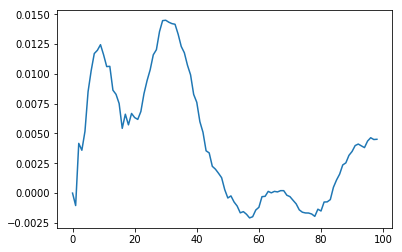

In [662]:
matplotlib.pyplot.plot(train_errors);

In [765]:
knn = KNeighborsRegressor(20)
knn.fit(X_train, y_train)
y_k_predict = knn.predict(X_train)

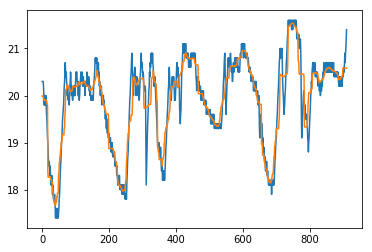

In [766]:
matplotlib.pyplot.plot(list(y_train))
matplotlib.pyplot.plot(y_k_predict.reshape(y_k_predict.shape[0]));

In [777]:
D_in = 2
D_out = 1
N = X_train.shape[0]

In [778]:
# Zufällige initialisierung der Gewichte
w = np.random.randn(D_in, D_out)
w

array([[-0.34699686],
       [ 0.98519129]])

In [779]:
learning_rate = 1e-2

In [787]:
loss_hist = []
# Train
for t in range(1000):
    # Berechne die Vorhersage
    y_pred = X_train.dot(w)
    y_pred = y_pred.reshape(y_pred.shape[0])
    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    loss = np.square(y_pred - y_train).sum()
    if t % 1 == 0:
        loss_hist.append(loss)
        print(t, loss)

    # Berechne die Gradienten von w1 im Bezug auf den Fehler 
    grad_y_pred = 2.0 * (y_pred - y_train)
    grad_w = (1/N) * X_train.T.dot(grad_y_pred)

    # Aktualisiere die Gewichte mittels Gradienten Abstieg
    w -= learning_rate * grad_w.reshape(2,1)

0 60833.97807923594
1 60187.41318395793
2 59556.73187214693
3 58941.54377706506
4 58341.46812654126
5 57756.133507150545
6 57185.17763418924
7 56628.247127303985
8 56084.997291635504
9 55555.091904341476
10 55038.20300636644
11 54534.010699329636
12 54042.20294740516
13 53562.47538407157
14 53094.531123611334
15 52638.080577243294
16 52192.84127377454
17 51758.53768466011
18 51334.90105336276
19 50921.6692289067
20 50518.586503522325
21 50125.40345428151
22 49741.87678862518
23 49367.76919368772
24 49002.8491893247
25 48646.89098475293
26 48299.674338714256
27 47960.984423076196
28 47630.61168978515
29 47308.35174108969
30 46994.00520295361
31 46687.37760158026
32 46388.279242971796
33 46096.52509544865
34 45811.934675056546
35 45534.33193379002
36 45263.545150563295
37 44999.406824860846
38 44741.75357300204
39 44490.42602695529
40 44245.26873563931
41 44006.130068650236
42 43772.86212235495
43 43545.3206282926
44 43323.364863827344
45 43106.85756499724
46 42895.66484150518
47 42689.6

376 34467.22028832189
377 34467.06810912296
378 34466.91765741238
379 34466.768898165275
380 34466.621797190215
381 34466.476321108785
382 34466.332437335695
383 34466.190114059405
384 34466.04932022322
385 34465.9100255068
386 34465.77220030818
387 34465.635815726244
388 34465.500843543516
389 34465.367256209574
390 34465.23502682462
391 34465.1041291237
392 34464.97453746112
393 34464.84622679537
394 34464.719172674355
395 34464.59335122099
396 34464.468739119184
397 34464.34531360013
398 34464.223052428984
399 34464.10193389177
400 34463.98193678273
401 34463.86304039192
402 34463.74522449309
403 34463.62846933191
404 34463.512755614465
405 34463.39806449601
406 34463.28437757005
407 34463.17167685766
408 34463.059944797016
409 34462.949164233316
410 34462.839318408805
411 34462.73039095314
412 34462.622365873925
413 34462.515227547556
414 34462.40896071021
415 34462.3035504491
416 34462.198982193964
417 34462.09524170869
418 34461.99231508322
419 34461.89018872559
420 34461.7888493

749 34445.41933958141
750 34445.39509289195
751 34445.37093586507
752 34445.34686816692
753 34445.32288946499
754 34445.298999428014
755 34445.27519772606
756 34445.25148403046
757 34445.22785801379
758 34445.20431934993
759 34445.18086771399
760 34445.157502782364
761 34445.134224232694
762 34445.111031743836
763 34445.0879249959
764 34445.06490367025
765 34445.04196744943
766 34445.01911601724
767 34444.996349058674
768 34444.97366625996
769 34444.95106730848
770 34444.92855189288
771 34444.90611970292
772 34444.88377042963
773 34444.861503765176
774 34444.83931940289
775 34444.81721703728
776 34444.79519636405
777 34444.77325708002
778 34444.7513988832
779 34444.72962147275
780 34444.70792454893
781 34444.68630781319
782 34444.6647709681
783 34444.64331371734
784 34444.621935765725
785 34444.60063681922
786 34444.579416584864
787 34444.558274770825
788 34444.53721108637
789 34444.51622524187
790 34444.495316948785
791 34444.47448591968
792 34444.45373186821
793 34444.43305450908
794

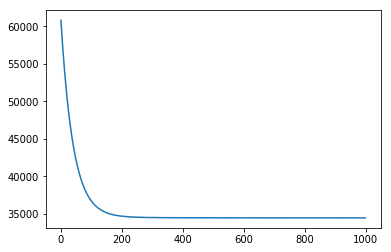

In [788]:
matplotlib.pyplot.plot(loss_hist);

In [789]:
y_pred = X_train.dot(w)

In [790]:
len(list(y_pred.reshape(y_pred.shape[0])))

911

In [791]:
sklearn.metrics.mean_squared_error(list(y_train), list(y_pred.reshape(y_pred.shape[0])))

37.80620037605172

In [792]:
len(list(y_train))

911

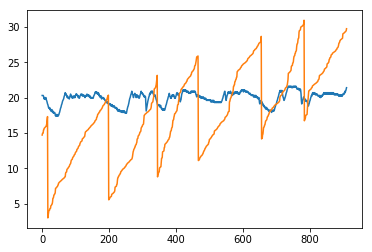

In [793]:

matplotlib.pyplot.plot(list(y_train))
matplotlib.pyplot.plot(list(y_pred));

In [706]:
#error = 
error = list(np.array(list(y_train)) - np.array(list(y_pred.reshape(y_pred.shape[0]))))

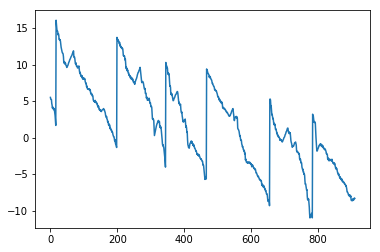

In [707]:
matplotlib.pyplot.plot(error);